# Classic MNIST : Handwritten Digits Recognition


## Importing packages

In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.nn as nn
from collections import OrderedDict

## Defining a transform 

In [2]:
transform=transforms.Compose([transforms.ToTensor()])

## Downloading training data and setting up a training data loader

In [4]:
train_data=datasets.MNIST('./data',train=True,download=True,transform=transform)
train_loader=torch.utils.data.DataLoader(train_data,batch_size=64,shuffle=True)
len(train_data)

100.1%Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw
113.5%Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw
100.4%Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw
180.4%Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw
Processing...
Done!


60000

## Downloading testing data and setting up a testing data loader

In [5]:
test_data=datasets.MNIST('./data',train=False,download=True,transform=transform)
test_loader=torch.utils.data.DataLoader(test_data,batch_size=64, shuffle=True)
len(test_data)


10000

## Defining our Sequential Network

In [6]:
model=nn.Sequential(OrderedDict([
    ('Layer1', nn.Linear(784,128)),
    ('Out1', nn.ReLU()),
    ('Layer2', nn.Linear(128,64)),
    ('Out2', nn.ReLU()),
    ('Layer3', nn.Linear(64,10)),
    ('output', nn.ReLU()),
    ('fin',nn.LogSoftmax(dim=1))
]))

## Displaying usage or OrderedDict vs Conventional indexing for model

In [7]:
model._modules['Layer1'], model[0]

(Linear(in_features=784, out_features=128, bias=True),
 Linear(in_features=784, out_features=128, bias=True))

## Defining our optimizer and loss function

In [35]:
optimizer=torch.optim.SGD(model.parameters(), lr=0.001)
criterion=nn.NLLLoss()


## Training the model for a fininte number of epochs

In [36]:
epoch = 5


for e in range(epoch):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        old_image=images
        images = images.view(images.shape[0], -1)
        output=model.forward(images)
        loss=criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()   
    else:
        print(f"Training loss: {running_loss/len(train_loader)}")

Training loss: 0.7672586552242735
Training loss: 0.764817461244333
Training loss: 0.7626271559231317
Training loss: 0.7607208383617117
Training loss: 0.7585423098507721


In [37]:
old_image.shape, old_image.shape[0], images.shape

(torch.Size([32, 1, 28, 28]), 32, torch.Size([32, 784]))

## Testing without gradients on training data itself

In [38]:
correct=0
total=0

with torch.no_grad():
    for x,y in train_loader:
        output=model.forward(x.view(x.shape[0],-1))
        for idx, i in enumerate(output):
            if torch.argmax(i)==y[idx]:
                correct+=1
            total+=1
print(f'Accuracy is {correct/total}')

Accuracy is 0.7242666666666666


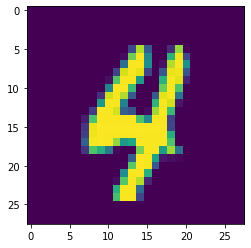

In [39]:
plt.imshow(x[0].view(28,28));

In [40]:
print(torch.argmax(output[0]))

tensor(4)


## Testing with test data

In [41]:
test_img,test_label=next(iter(test_loader))

In [42]:
test_img=test_img.view(test_img.shape[0],-1)
test_output=model.forward(test_img)

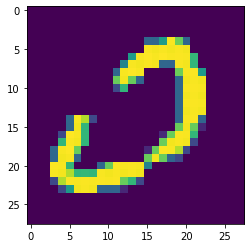

In [43]:
plt.imshow(test_img[0].view(28,28));

In [44]:
print(torch.argmax(test_output[0]))


tensor(0)
